# **Finite Difference Method (FDM)**



### Simple Intuitive Example

We consider the function  
$$
y(x) = x^3
$$

The exact derivative is  
$$
y'(x) = 3x^2
$$

Our goal is to **approximate the derivative using finite differences** and then **reconstruct the function values** using a forward difference scheme, starting from an initial condition.

---

Initial condition:
$$
y(0) = y_0 = 0
$$

Using the forward difference approximation:
$$
y'(x_i) \approx \frac{y_{i+1} - y_i}{h}
$$

Rearranging:
$$
y_{i+1} = y_i + h \, y'(x_i)
$$

Since:
$$
y'(x) = 3x^2
$$

the update rule becomes:
$$
y_{i+1} = y_i + h \cdot 3x_i^2
$$



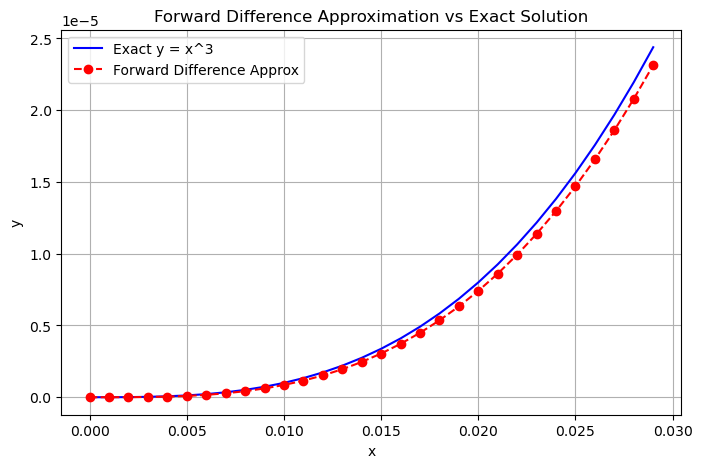

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step size
h = 0.001
x = np.arange(0, 0.03, h)

# True function for comparison
def y_true(x):
    return x**3

# Initialize forward difference array
y_fd = np.zeros(len(x)) # initial condition y(0) = 0

# Forward difference main loop
for i in range(len(x) - 1):
    y_fd[i + 1] = y_fd[i] + h * 3 * (x[i] ** 2)

y_exact = y_true(x) # True values

# Plot difference
plt.figure(figsize=(8,5))
plt.plot(x, y_exact, 'b-', label='Exact y = x^3')
plt.plot(x, y_fd, 'ro--', label='Forward Difference Approx')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Forward Difference Approximation vs Exact Solution')
plt.legend()
plt.grid(True)
plt.show();

---

### Explicit Finite Difference Method — European Call Option

### PDE (Black–Scholes)
$$
\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + r S \frac{\partial V}{\partial S} - r V = 0
$$

### Grid
- Asset: $S_0, S_1, \dots, S_M$, step $\Delta S$
- Time: $t_0, t_1, \dots, t_N$, step $\Delta t$
- Grid value: $V_i^n \approx V(S_i, t_n)$

### Finite Differences

**Time derivative (backward in time):**
$$
\frac{\partial V}{\partial t} \approx \frac{V_i^n - V_i^{n+1}}{\Delta t}
$$

**First derivative (central difference):**
$$
\frac{\partial V}{\partial S} \approx \frac{V_{i+1}^{n+1} - V_{i-1}^{n+1}}{2 \Delta S}
$$

**Second derivative (central difference):**
$$
\frac{\partial^2 V}{\partial S^2} \approx \frac{V_{i+1}^{n+1} - 2 V_i^{n+1} + V_{i-1}^{n+1}}{\Delta S^2}
$$

### Explicit Time Stepping
$$
V_i^n = V_i^{n+1} - \Delta t \Bigg[ \frac{1}{2}\sigma^2 S_i^2 \frac{V_{i+1}^{n+1} - 2V_i^{n+1} + V_{i-1}^{n+1}}{\Delta S^2} + r S_i \frac{V_{i+1}^{n+1} - V_{i-1}^{n+1}}{2 \Delta S} - r V_i^{n+1} \Bigg]
$$

### Terminal Condition
At maturity $T$:
$$
V(S,T) = \max(S - K, 0) \quad \text{(call option)}
$$

### Boundary Conditions
- $S = 0$: $V = 0$
- $S \to \infty$: $V \approx S - K e^{-r(T-t)}$

### One Step Update Logic
1. Compute derivatives using central differences at each spatial node.
2. Calculate $\theta = \frac{1}{2}\sigma^2 S_i^2 \Gamma + r S_i \Delta - r V_i^{n+1}$
3. Update $V_i^n = V_i^{n+1} - \Delta t \cdot \theta$
4. Repeat backward through all time steps to $t=0$.
